In [55]:
import os
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [254]:
fname  = os.path.expandvars("$HOME/Software/HK_Software/WCSimFQTuningTools/CProfiles/cprofiles_fits.root")

f  = uproot.open(fname)

In [532]:
n = 0

# get integral and parameters histograms
Is, r0bins, th0bins, mbins = f[f"I_{n}"].to_numpy()
js, r0bins, th0bins, jbins = f[f"hI3d_par_{n}"].to_numpy()

momenta = np.log((mbins[1:] + mbins[:-1])/2.)

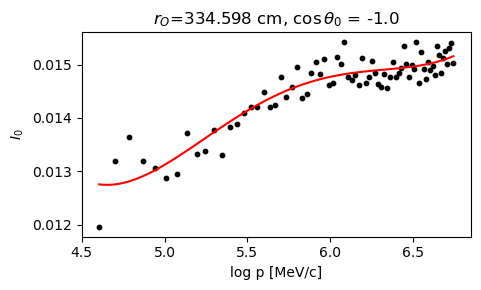

In [542]:
# choose random bin index
r0bin  = np.random.randint(len(r0bins)-1)
th0bin = np.random.randint(len(th0bins)-1)

I = Is[r0bin, th0bin]

# plot
plt.figure(figsize=[5, 3])
plt.title(rf"$r_O$={round(r0bins[r0bin]/10, 3)} cm, $\cos \theta_0$ = {round(th0bins[th0bin], 2)}")

plt.scatter(momenta, I, s=10, color="k")

pol = np.poly1d(np.flip(js[r0bin, th0bin, :-2]))

px = np.linspace(momenta[0], momenta[-1], 100)
plt.plot(px, pol(px), color="r")

plt.xlabel("log p [MeV/c]")
plt.ylabel(fr"$I_{n}$")
plt.tight_layout()
